# DATASET 2 - GPU Runtime 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz 
import pydotplus
import io
from scipy import misc
from sklearn.ensemble import AdaBoostClassifier


In [33]:

#importing the data
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
df = dt.copy()

#classifying numeric runtime into two classes. Run time higher than 250 is 0 and lower will be 1
df['target'] = np.where(df['MeanRun']>250, 0, 1)

#dropping the numeric target column
df.drop('MeanRun',axis=1,inplace=True)

#As SVM takes long time to run, sampling only 25000 records for running this algorithm
dt = df.sample(n = 50000)

#
X_dataset=dt.drop(columns=['target'])
y=dt['target']

from sklearn import preprocessing
X = preprocessing.scale(X_dataset)



In [35]:
from sklearn.model_selection import cross_val_score

tree_g         = DecisionTreeClassifier()
array_scores_g = cross_val_score(tree_g,X,y,cv=5)
array_mean_g   = array_scores_g.mean()

tree_e         = DecisionTreeClassifier(criterion='entropy')
array_scores_e = cross_val_score(tree_e,X,y,cv=5)
array_mean_e   = array_scores_e.mean()


print("GINI    : Accuracy of decision tree without hyperparameter tuning: ",array_mean_g)
print(tree_g)
print()
print()
print()
print("ENTROPY :Accuracy of decision tree without hyperparameter tuning: ",array_mean_e)
print(tree_e)

GINI    : Accuracy of decision tree without hyperparameter tuning:  0.9889199999999999
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')



ENTROPY :Accuracy of decision tree without hyperparameter tuning:  0.9890399999999999
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       ran

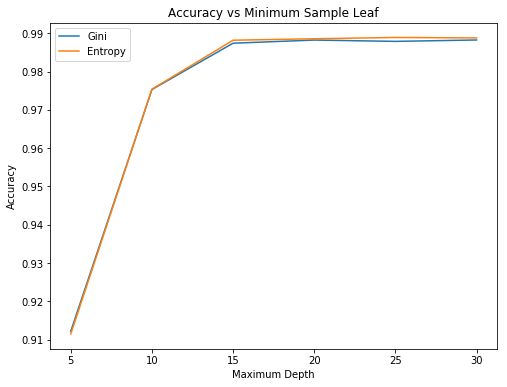

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

max_depth_list = [5,10,15,20,25,30]
max_depth_ =[]
accuracy_list_g = []
accuracy_list_e = []
for i in max_depth_list:
    tree_g = DecisionTreeClassifier(criterion='gini',max_depth=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    max_depth_.append(i)
    

plt.plot(max_depth_,accuracy_list_g,label='Gini')
plt.plot(max_depth_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Minimum Sample Leaf')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



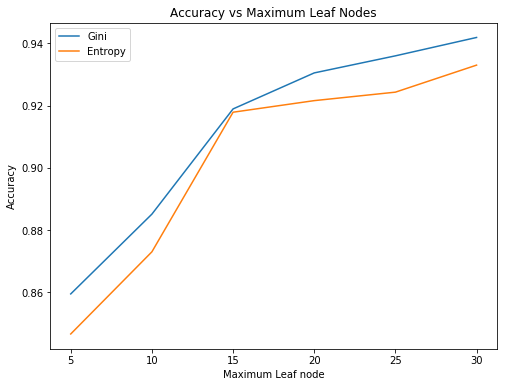

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
max_leaf_nodes_list = [5,10,15,20,25,30]
max_leaf_nodes_ =[]
accuracy_list_g = []
accuracy_list_e = []
C_params = []
for i in max_leaf_nodes_list:
    tree_g = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    max_leaf_nodes_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Leaf node')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Leaf Nodes')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



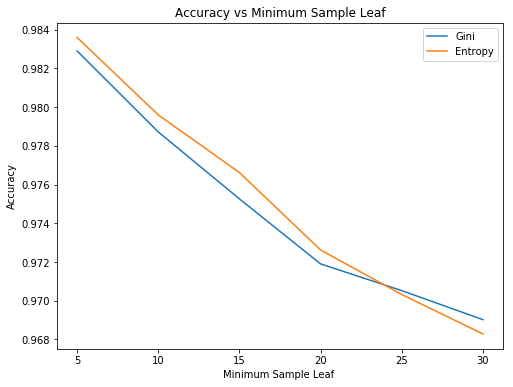

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
min_samples_leaf_list = [5,10,15,20,25,30]
min_samples_leaf_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in max_leaf_nodes_list:
    tree_g = DecisionTreeClassifier(criterion='gini',min_samples_leaf=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    min_samples_leaf_.append(i)
    

plt.plot(min_samples_leaf_,accuracy_list_g,label='Gini')
plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Minimum Sample Leaf ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Minimum Sample Leaf')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



# ADAPTIVE BOOSTING

No handles with labels found to put in legend.


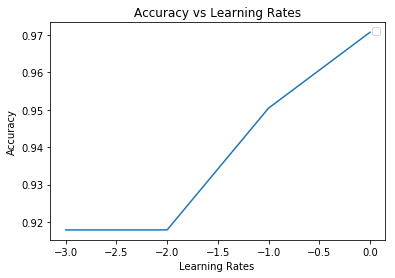

In [18]:
accuracy_list = []

learning_rates =[.001,.01,.1,1]
for i in learning_rates:
    model = DecisionTreeClassifier(criterion='entropy',max_depth =15,min_samples_leaf=15,max_leaf_nodes=15)
    Adaboost = AdaBoostClassifier(base_estimator=model,n_estimators=10,learning_rate=i)
    #boostmodel = Adaboost.fit(X_train,y_train)
    array_scores = cross_val_score(Adaboost,X,y,cv=5)
    array_mean = array_scores.mean()
    print("for learning rate= ",i," Accuracy is : ",array_mean)
    accuracy_list.append(array_mean)
    

plt.plot(np.log10(learning_rates),accuracy_list)
#plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Learning Rates ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Learning Rates')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)

# ADAPTIVE BOOSTING - Pruned

GINI: for minimum sample =  5  mean accuracy is  0.98688
ENTROPY: for minimum sample =  5  mean accuracy is  0.9867600000000001
GINI: for minimum sample =  10  mean accuracy is  0.98736
ENTROPY: for minimum sample =  10  mean accuracy is  0.9874
GINI: for minimum sample =  15  mean accuracy is  0.9873799999999999
ENTROPY: for minimum sample =  15  mean accuracy is  0.9873000000000001
GINI: for minimum sample =  20  mean accuracy is  0.9878199999999999
ENTROPY: for minimum sample =  20  mean accuracy is  0.98856
GINI: for minimum sample =  25  mean accuracy is  0.98798
ENTROPY: for minimum sample =  25  mean accuracy is  0.9878600000000001
GINI: for minimum sample =  30  mean accuracy is  0.9878199999999999
ENTROPY: for minimum sample =  30  mean accuracy is  0.98734


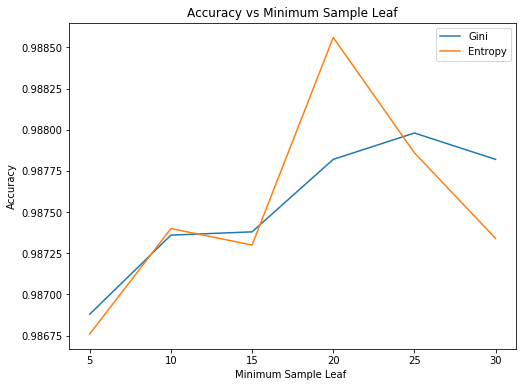

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
min_samples_leaf_list = [5,10,15,20,25,30]
min_samples_leaf_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in min_samples_leaf_list:
    model_g = DecisionTreeClassifier(criterion='gini',min_samples_leaf =i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for minimum sample = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for minimum sample = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    min_samples_leaf_.append(i)
    

plt.plot(min_samples_leaf_,accuracy_list_g,label='Gini')
plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Minimum Sample Leaf ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Minimum Sample Leaf')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




GINI: for maximum leaf node =  5  mean accuracy is  0.97976
ENTROPY: for maximum leaf nodes =  5  mean accuracy is  0.9868600000000001
GINI: for maximum leaf node =  10  mean accuracy is  0.98844
ENTROPY: for maximum leaf nodes =  10  mean accuracy is  0.98744
GINI: for maximum leaf node =  15  mean accuracy is  0.98978
ENTROPY: for maximum leaf nodes =  15  mean accuracy is  0.9878399999999999
GINI: for maximum leaf node =  20  mean accuracy is  0.98984
ENTROPY: for maximum leaf nodes =  20  mean accuracy is  0.9878800000000002
GINI: for maximum leaf node =  25  mean accuracy is  0.98924
ENTROPY: for maximum leaf nodes =  25  mean accuracy is  0.9882799999999999
GINI: for maximum leaf node =  30  mean accuracy is  0.9898800000000001
ENTROPY: for maximum leaf nodes =  30  mean accuracy is  0.9883400000000002


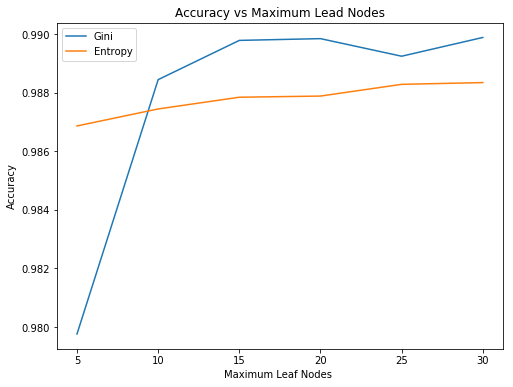

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
max_leaf_nodes_list = [5,10,15,20,25,30]
max_leaf_nodes_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in max_leaf_nodes_list:
    model_g = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for maximum leaf node = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for maximum leaf nodes = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    max_leaf_nodes_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Leaf Nodes ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Lead Nodes')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




GINI: for maximum depth =  5  mean accuracy is  0.9896800000000001
ENTROPY: for maximum depth =  5  mean accuracy is  0.98996
GINI: for maximum depth =  10  mean accuracy is  0.9875400000000001
ENTROPY: for maximum depth =  10  mean accuracy is  0.98762
GINI: for maximum depth =  15  mean accuracy is  0.98634
ENTROPY: for maximum depth =  15  mean accuracy is  0.98614
GINI: for maximum depth =  20  mean accuracy is  0.9881
ENTROPY: for maximum depth =  20  mean accuracy is  0.9881800000000001
GINI: for maximum depth =  25  mean accuracy is  0.9884000000000001
ENTROPY: for maximum depth =  25  mean accuracy is  0.98874
GINI: for maximum depth =  30  mean accuracy is  0.9883600000000001
ENTROPY: for maximum depth =  30  mean accuracy is  0.9888999999999999


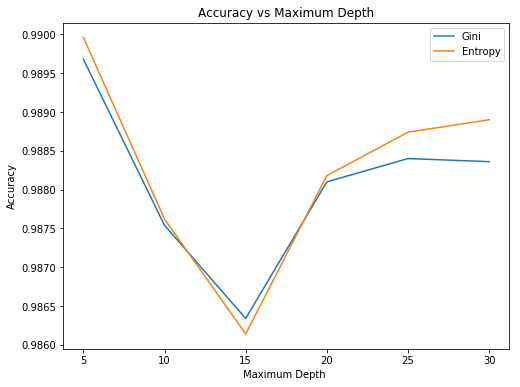

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

max_depth_list = [5,10,15,20,25,30]
max_depth_ =[]
accuracy_list_g = []
accuracy_list_e = []



for i in max_leaf_nodes_list:
    model_g = DecisionTreeClassifier(criterion='gini',max_depth=i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for maximum depth = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',max_depth =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for maximum depth = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    max_depth_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Depth ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Depth')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




# Finding Best Parameters for Decision Tree using Grid Search

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],
                  'max_depth': np.arange(5, 15),
                  'max_leaf_nodes':np.arange(15,30),
                  'min_samples_leaf':np.arange(15,30)
                  }
    

    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [23]:
dtree_grid_search(X,y,3)

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 15}

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
import pydotplus
import io
from scipy import misc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
df.columns

Index(['MWG_Ordinal', 'NWG_Ordinal', 'KWG_Ordinal', 'MDIMC_ordinal',
       'NDIMC_ordinal', 'MDIMA_ordinal', 'NDIMB_ordinal', 'KWI_ordinal',
       'VWM_ordinal', 'VWN_ordinal', 'STRM_1', 'STRN_1', 'SA_1', 'SB_1',
       'target'],
      dtype='object')

In [27]:
features = ['MWG_Ordinal', 'NWG_Ordinal', 'KWG_Ordinal', 'MDIMC_ordinal',
       'NDIMC_ordinal', 'MDIMA_ordinal', 'NDIMB_ordinal', 'KWI_ordinal',
       'VWM_ordinal', 'VWN_ordinal', 'STRM_1', 'STRN_1', 'SA_1', 'SB_1']

In [36]:
c=DecisionTreeClassifier(criterion='gini',max_depth= 8,max_leaf_nodes= 29,min_samples_leaf=15)
array_scores = cross_val_score(c,X,y,cv=5)
Accuracy = array_scores.mean()
print(Accuracy)

0.94228


In [29]:
d_t = c.fit(X,y)

In [30]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)
    

C:\Users\Kamini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


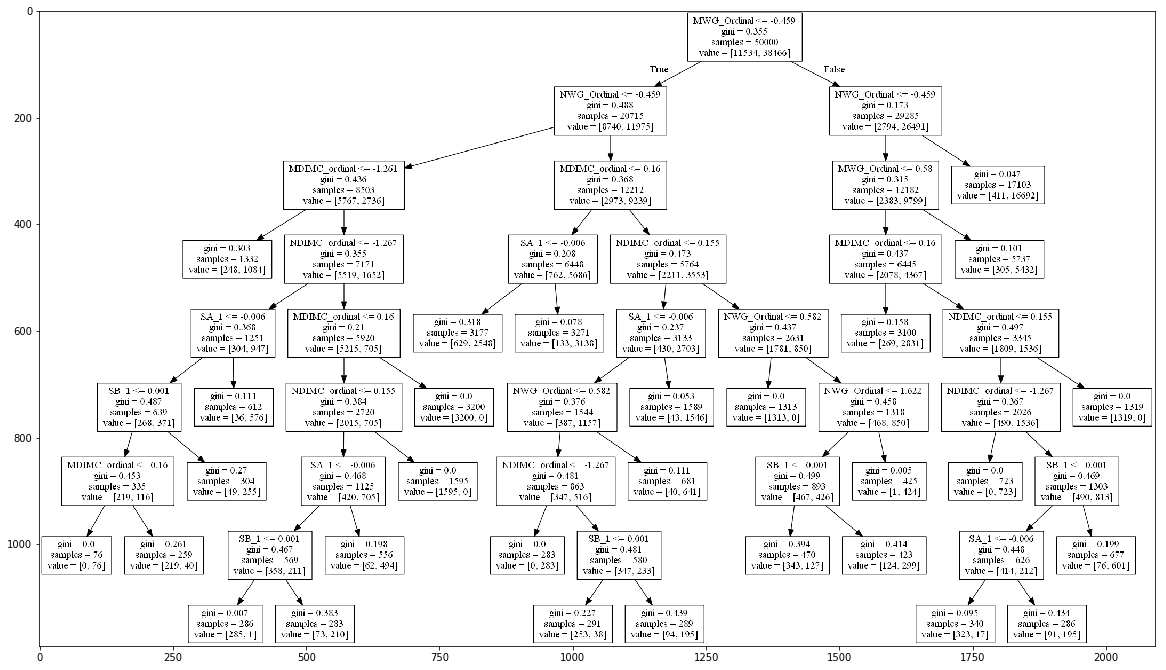

In [31]:
show_tree(d_t,features,'DT_Dataset2.png')

In [ ]:
ADAPTIVE BOOSTING - GRIDSEARCH

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],
                  'max_depth': np.arange(5, 15),
                  'max_leaf_nodes':np.arange(15,30),
                  'min_samples_leaf':np.arange(15,30)
                  }
    

    # decision tree model
    dtree_model=DecisionTreeClassifier()
    Adaboost_e = AdaBoostClassifier(base_estimator=dtree_model,n_estimators=100,learning_rate=1)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=4)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [40]:
dtree_grid_search(X,y,3)

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 15}

In [41]:
c=DecisionTreeClassifier(criterion='gini',max_depth=8 ,max_leaf_nodes=29 ,min_samples_leaf=15)
Adaboost = AdaBoostClassifier(base_estimator=c,n_estimators=100,learning_rate=1)
array_scores = cross_val_score(Adaboost,X,y,cv=3)
Accuracy = array_scores.mean()
print(Accuracy)

0.9896199915915278
